In [1]:
import numpy as np
import matplotlib.pyplot as plt
import rc_animation as rc_ani
import time
startTime = time.time()

## Rigid Body (Frisbee) Rotation

In [2]:
radiusRB = np.array([1,2,3,4,5])
velocityRB = np.array([0.1,0.2,0.3,0.4,0.5])

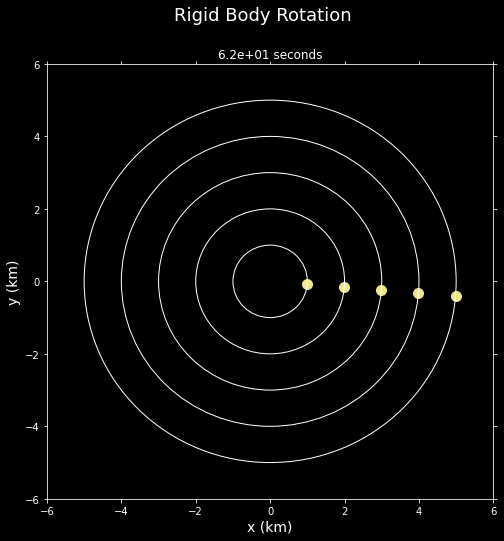

In [3]:
rc_ani.MakeAnimation(radiusRB,velocityRB,
                     100,1,                                  # time and dt
                     'rigidbody.gif','Rigid Body Rotation')  # file name and title of plot

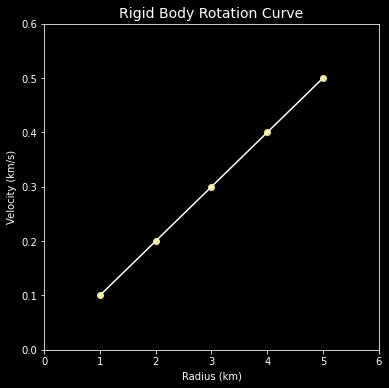

In [4]:
rc_ani.PlotRotationCurve(radiusRB,velocityRB,'Rigid Body Rotation Curve')

In [5]:
# Calculation time
executionTime1 = (time.time() - startTime)
ttt1=executionTime1/60
print(f'Execution time: {ttt1:.2f} minutes')

Execution time: 0.09 minutes


## Planet-like Rotation

In [6]:
# Parameters

G = 6.67408e-11         #Gravitational constant (in m^3 kg^-1 s^-2)
AU = 1.496e11           #Astronomical Unit (in meters)

# Mass (M) in kg
M_Earth = 5.972e24      
M_Sun = 3.3e5*M_Earth
M_Mercury = 0.055*M_Earth
M_Venus = 0.82*M_Earth
M_Mars = 0.11*M_Earth
M_Jupiter = 318*M_Earth
M_Saturn = 95.2*M_Earth
M_Uranus = 14.5*M_Earth
M_Neptune = 17.1*M_Earth

massesSS = np.array([M_Mercury,M_Venus,M_Earth,M_Mars,M_Jupiter,M_Saturn,M_Uranus,M_Neptune])

# Distance (r) in meters
r_Earth = AU
r_Mercury = 0.39*AU 
r_Venus = 0.72*AU
r_Mars = 1.52*AU
r_Jupiter = 5.20*AU
r_Saturn = 9.54*AU
r_Uranus = 19.2*AU
r_Neptune = 30.1*AU

radiusSS = np.array([r_Mercury,r_Venus,r_Earth,r_Mars,r_Jupiter,r_Saturn,r_Uranus,r_Neptune])

# Orbital velocity in m/s
v_Mercury = np.sqrt((G*M_Sun)/r_Mercury)
v_Venus = np.sqrt((G*(M_Sun+M_Mercury))/r_Venus)
v_Earth = np.sqrt((G*(M_Sun+M_Mercury+M_Venus))/r_Earth)
v_Mars = np.sqrt((G*(M_Sun+M_Mercury+M_Venus+M_Earth))/r_Mars)
v_Jupiter = np.sqrt((G*(M_Sun+M_Mercury+M_Venus+M_Earth+M_Mars))/r_Jupiter)
v_Saturn = np.sqrt((G*(M_Sun+M_Mercury+M_Venus+M_Earth+M_Mars+M_Jupiter))/r_Saturn)
v_Uranus = np.sqrt((G*(M_Sun+M_Mercury+M_Venus+M_Earth+M_Mars+M_Jupiter+M_Saturn))/r_Uranus)
v_Neptune = np.sqrt((G*(M_Sun+M_Mercury+M_Venus+M_Earth+M_Mars+M_Jupiter+M_Saturn+M_Uranus))/r_Neptune)

velocitySS = np.array([v_Mercury,v_Venus,v_Earth,v_Mars,v_Jupiter,v_Saturn,v_Uranus,v_Neptune])

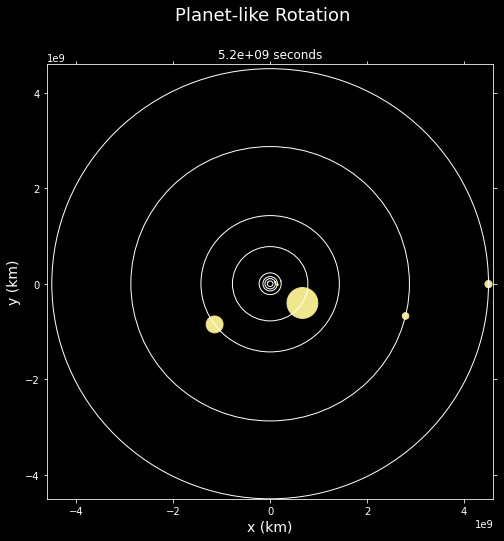

In [7]:
rc_ani.MakeAnimation(1e-3*radiusSS,1e-3*velocitySS,   # change unit to km
                     5e10,1e7,                         # time and dt
                     'solarsystem.gif','Planet-like Rotation',
                     1e8,1e8,                         # xlim and ylim
                     size=True,masses=massesSS)          

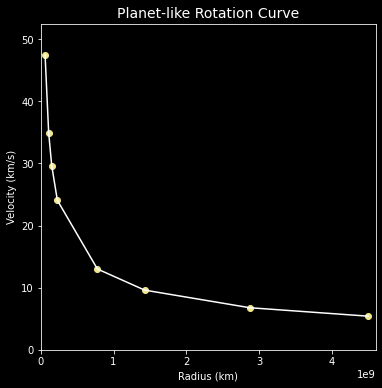

In [8]:
rc_ani.PlotRotationCurve(1e-3*radiusSS,1e-3*velocitySS,
                  'Planet-like Rotation Curve',
                  xlabel='Radius (km)',ylabel='Velocity (km/s)',
                 xlim=1e8,ylim=5)

In [9]:
# Calculation time
executionTime2 = (time.time() - startTime)
ttt2=executionTime2/60
print(f'Execution time: {ttt2:.2f} minutes')

Execution time: 0.83 minutes


## Flat Rotation

In [10]:
radiusFR = np.array([1,2,3,4,5,6,7])
velocityFR = np.array([0.1,0.24,0.29,0.31,0.31,0.31,0.31])

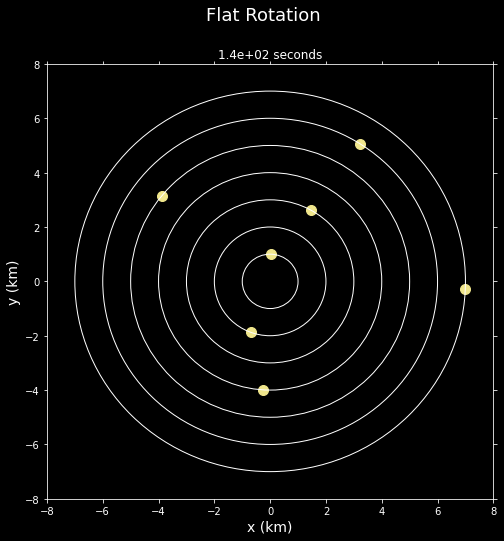

In [11]:
rc_ani.MakeAnimation(radiusFR,velocityFR,
                     200,1,                                # time and dt
                     'flatrotation.gif','Flat Rotation')   # file name and title of plot

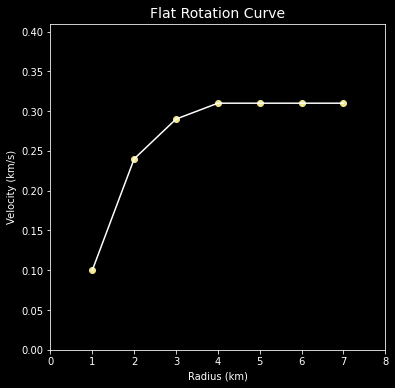

In [12]:
rc_ani.PlotRotationCurve(radiusFR,velocityFR,'Flat Rotation Curve')

In [13]:
# Calculation time
executionTime3 = (time.time() - startTime)
ttt3=executionTime3/60
print(f'Execution time: {ttt3:.2f} minutes')

Execution time: 1.08 minutes
